<a href="https://colab.research.google.com/github/Sherlysukmadira/DIF62130_A_25_2311532015_SHERLY-SUKMADIRA-PUTRI/blob/main/praktikum%204/Dimensionality%20Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada praktikum ini, kita menggunakan dataset iris.

In [5]:
#load data
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

n_samples, n_features = X.shape


print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")



Number of samples: 150
Number of features: 4


# Visualisasi menggunakan histogram dan scatter plot


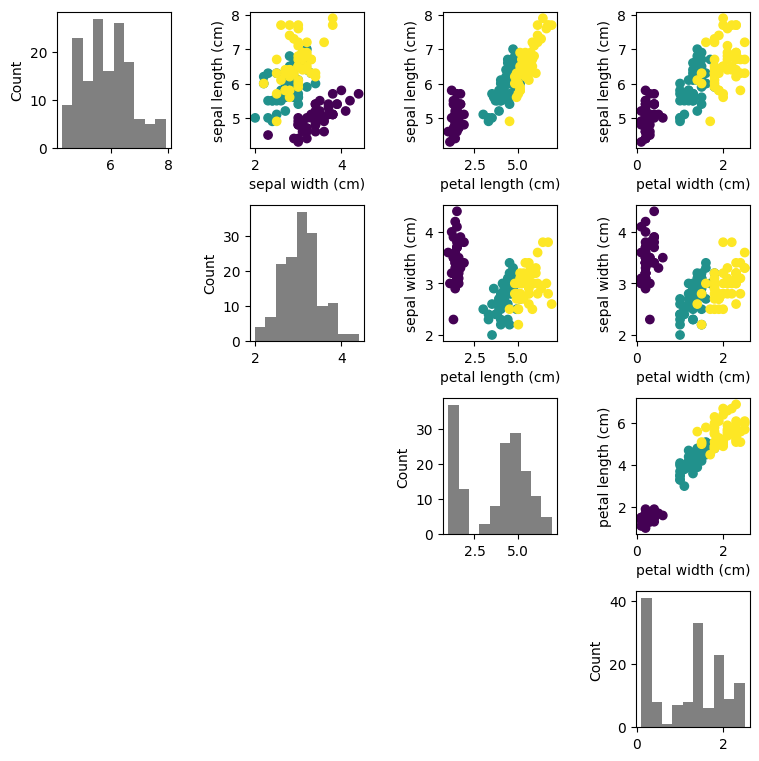

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

# Load data iris
iris = load_iris()
X = iris.data
y = iris.target
names = iris.feature_names
n_features = X.shape[1]

# Buat plot grid
fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout(pad=2.0)

# Plot scatter untuk bagian atas segitiga
for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[i, j].scatter(X[:, j], X[:, i], c=y)
    ax[i, j].set_xlabel(names[j])
    ax[i, j].set_ylabel(names[i])
    ax[j, i].set_axis_off()  # Nonaktifkan sisi bawah segitiga

# Plot histogram di diagonal
for i in range(n_features):
    ax[i, i].hist(X[:, i], color='gray')
    ax[i, i].set_ylabel('Count')

plt.show()




# Standarisasi data

dilakukan untuk memastikan algoritma dapat memproses kumpulan data secara efisien

In [7]:
def mean (x): #np.mean(X, axis = 0)
  return sum(x)/len(x)

def std(x): #np.std(X, axis = 0)
  return (sum((i - mean(x))*2 for i in x)/len(x))*0.5

def Standardize_data(X):
  return (X-mean(X))/std(X)

X_std = Standardize_data(X)





In [8]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Menghitung eigenvectors dan eigenvalue

In [9]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance (X_std) #np.cov (X_std.T)

In [10]:
from numpy.linalg import eig

#eigendecomposition of covariance matrik
eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs)

# urutkan eigenvectors dan eigenvalue

In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([X[0] for X in eig_pairs])
eig_vecs_sorted = np.array([X[1] for X in eig_pairs])

print(eig_pairs)

[(np.float64(3.7702857259141706e+30), array([ 0.3258659 , -0.43751036, -0.77753535,  0.31278568])), (np.float64(3.243524288778495e+29), array([-0.11214649, -0.89768219,  0.3827857 , -0.18725641])), (np.float64(1.2914490088339642e+29), array([ 0.34932169,  0.04218603, -0.2411769 , -0.90444922])), (np.float64(1.261478865339787e+28), array([0.87132596, 0.03117238, 0.4367466 , 0.22152146]))]


# Pilih principal components

In [12]:
k=2
W = eig_vecs_sorted[:k,:]

print(W.shape)

(2, 4)


Explained variance: [89.    7.66  3.05  0.3 ]
Cumulative explained variance: [ 89.    96.66  99.71 100.01]


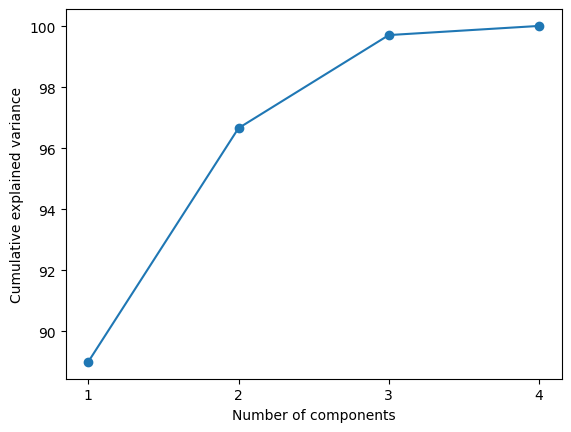

In [13]:
eig_vals_total = sum(eig_vals_sorted)
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features + 1), cum_explained_variance, '-o')
plt.xticks(np.arange(1, n_features + 1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Proyeksikan data

In [14]:
X_proj = X_std.dot(W.T)

print(X_proj.shape) #dimensi data hasil transformasi
print(X.shape)      #dimensi data awal

(150, 2)
(150, 4)


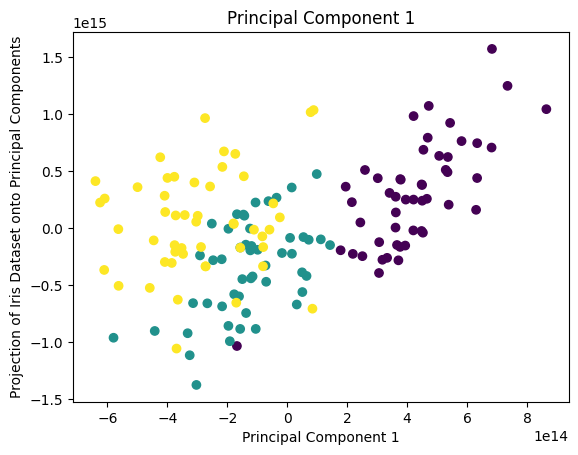

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='viridis')
plt.title('Principal Component 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Projection of Iris Dataset onto Principal Components')
plt.show()

# PCA with scikit-learn

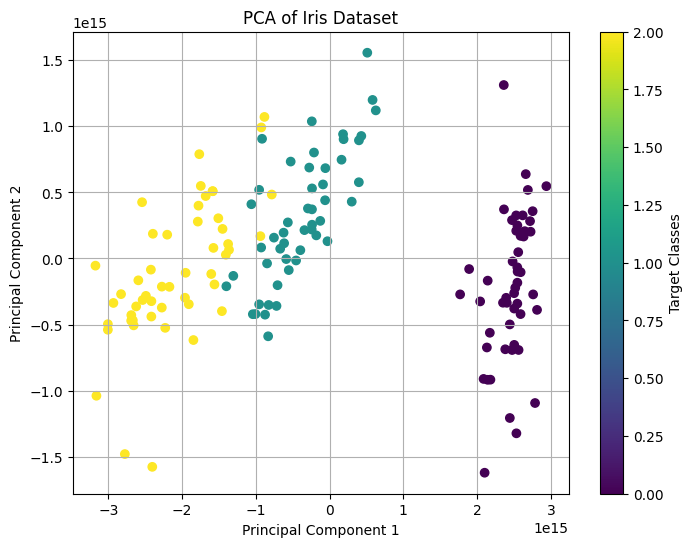

In [19]:
from sklearn.decomposition import PCA

# 4. Terapkan PCA (misalnya ke 2 komponen utama)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# 5. Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter, label='Target Classes')
plt.grid(True)
plt.show()